In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import gudhi as gd
import itertools

import tadasets
from datetime import datetime

import ecc
import ecc_plot
import euler_edges
import cliques_counting as cc

In [41]:
def compare_methods(points, epsilon, draw_lines=True):
    # ECC
    print("Local Simplex")
    start=datetime.now()
    c = ecc.compute_local_contributions(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c))
     
    e = ecc_plot.euler_characteristic_list_from_all(c)
    print("\t points in the ecc plot:    ", len(e))
    
    ecc_plot.plot_euler_curve(e, draw_lines, "Local Simplex")
    
    # cliques counting
    print("\n Cliques counting")
    start=datetime.now()
    c = cc.compute_all_contributions_nx(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c))
    
    e_cc = ecc_plot.euler_characteristic_list_from_all(c)
    print("\t points in the ecc plot:    ", len(e_cc))
    
    ecc_plot.plot_euler_curve(e_cc, draw_lines, "Cliques counting")
    
    #assert((e == e_cc).all())
    
    
    # edges
    print("\n Edges")
    start=datetime.now()
    c = euler_edges.compute_local_contributions_gd(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c))
    
    e_ee = euler_edges.euler_characteristic_list_from_edges(c)
    print("\t points in the ecc plot:    ", len(e_ee))
    ecc_plot.plot_euler_curve(e_ee, draw_lines, "Edges")    

# TEST

## Triangle

In [3]:
point_cloud = np.array([[0, 0], [4,0], [0,3] ])

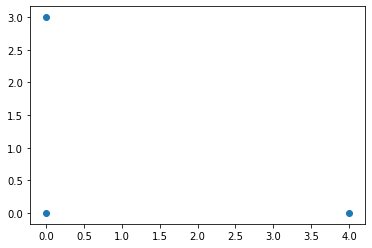

In [4]:
plt.scatter(point_cloud[: , 0], point_cloud[: , 1])

Local Simplex
	 time: 0:00:00.000811

 Cliques counting
	 time: 0:00:00.000495

 Edges
	 time: 0:00:00.000426


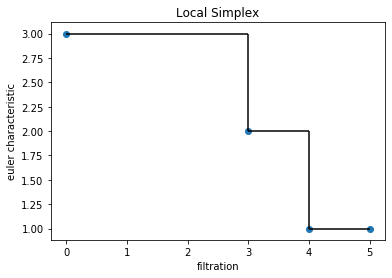

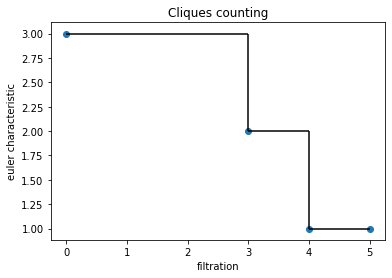

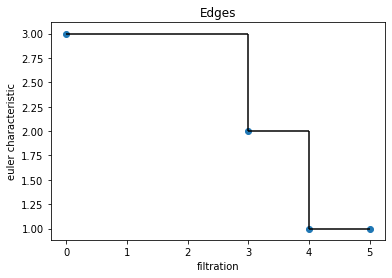

In [5]:
compare_methods(point_cloud, 10)

## Rhomboid

In [6]:
point_cloud = np.array([[4,0], [0,3.5], [-2, 0], [-0.5, -3]])

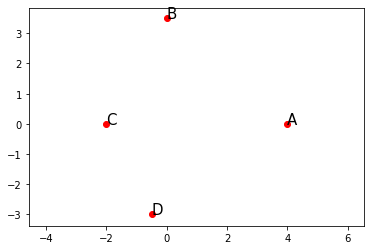

In [7]:
plt.axis('equal')
labels = ["A", "B", "C", "D"]
for i in range(len(point_cloud)):
    plt.scatter(point_cloud[i][0], point_cloud[i][1], color = "red")
    plt.text(point_cloud[i][0], point_cloud[i][1], labels[i], fontsize =15)


Local Simplex
	 time: 0:00:00.000589

 Cliques counting
	 time: 0:00:00.000871

 Edges
	 time: 0:00:00.000747


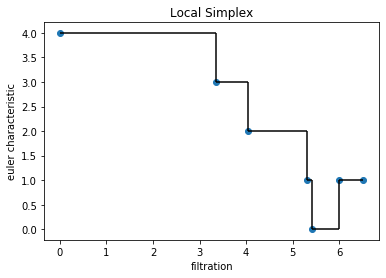

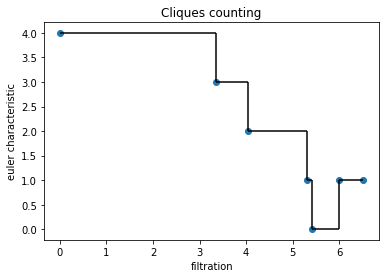

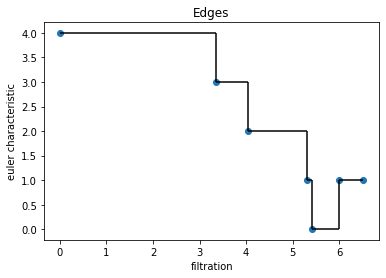

In [8]:
compare_methods(point_cloud, 10)

## Tetrahedron

In [9]:
point_cloud = np.array([[0,0,0], [0,1,0], [2,0,0], [0,0,3]])

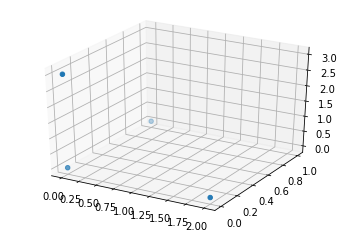

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in point_cloud], [x[1] for x in point_cloud], [x[2] for x in point_cloud])

Local Simplex
	 time: 0:00:00.000619

 Cliques counting
	 time: 0:00:00.000938

 Edges
	 time: 0:00:00.000796


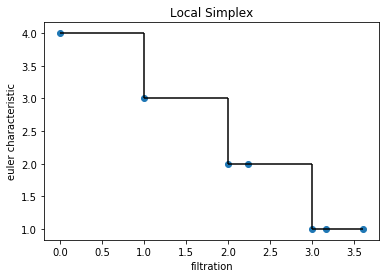

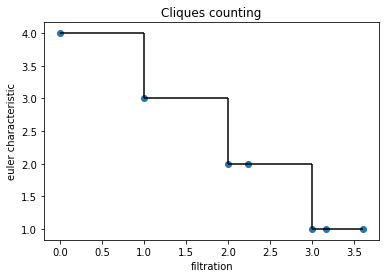

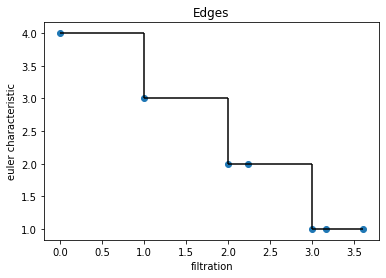

In [11]:
compare_methods(point_cloud, 10)

## Points from the example in the slides



In [12]:
point_cloud = np.array([[0,0], [2,-0.2], [4,0.2], [0,-1.5], [2,-3], [4,-1], [3.8,-2.5]] )

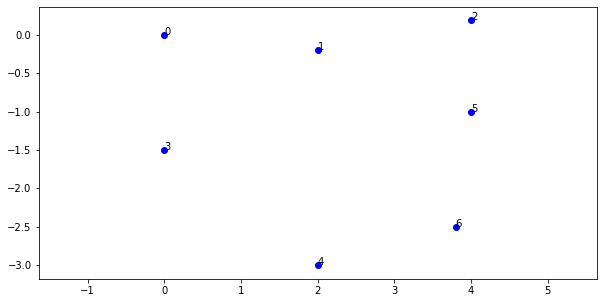

In [13]:
plt.figure(figsize=(10,5))
plt.axis('equal')
for i in range(len(point_cloud)):
    plt.scatter(point_cloud[i][0], point_cloud[i][1], color = "blue")
    plt.text(point_cloud[i][0], point_cloud[i][1], i)

Local Simplex
	 time: 0:00:00.002559

 Cliques counting
	 time: 0:00:00.004361

 Edges
	 time: 0:00:00.004609


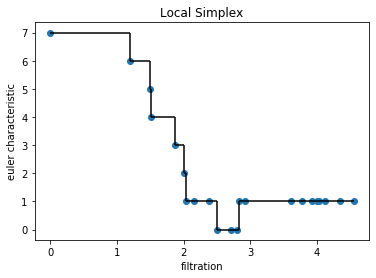

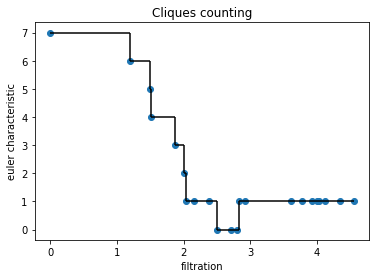

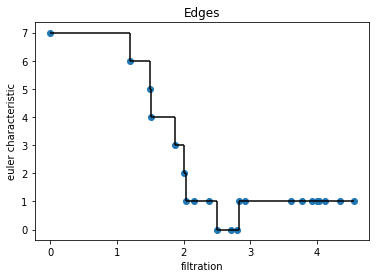

In [14]:
compare_methods(point_cloud, 10)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Circle

In [15]:
point_cloud = []

NUMBER_OF_POINTS = 20

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
point_cloud = np.array(point_cloud)

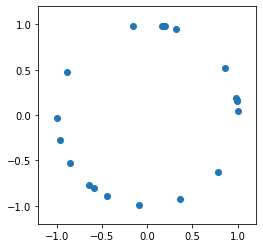

In [16]:
plt.axis('scaled')
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.scatter(point_cloud[:,0], point_cloud[:,1])

Local Simplex
	 time: 0:00:13.154021

 Cliques counting
	 time: 0:02:35.643164

 Edges
	 time: 0:00:53.000619


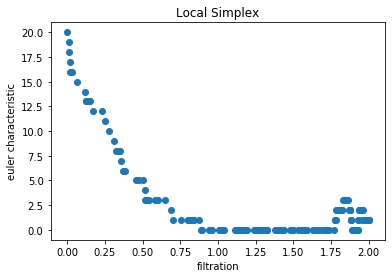

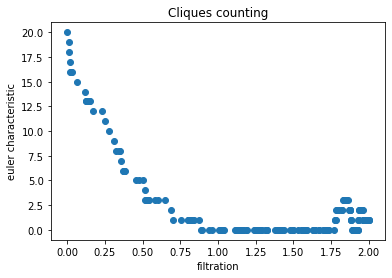

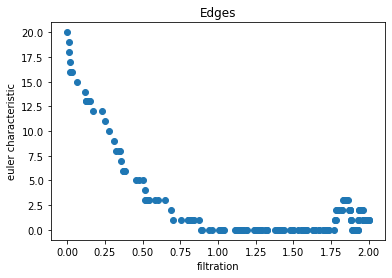

In [17]:
compare_methods(point_cloud, 2, False)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Double circle

In [27]:
point_cloud = []

NUMBER_OF_POINTS = 25

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([5*np.cos(angle), 5*np.sin(angle)])
    
    
point_cloud = np.array(point_cloud)

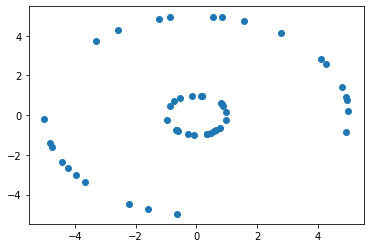

In [28]:
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

Local Simplex
	 time: 0:00:00.057978

 Cliques counting
	 time: 0:00:00.052712

 Edges
	 time: 0:00:00.085883


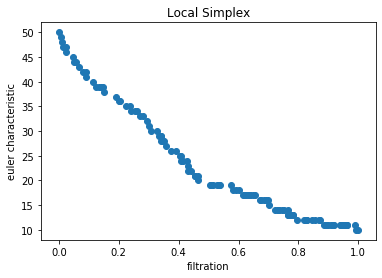

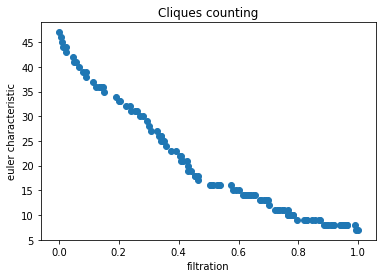

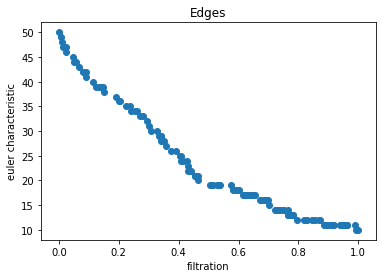

In [29]:
compare_methods(point_cloud, 1, draw_lines=False)
#rounding error

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# infinity

In [30]:
point_cloud = tadasets.infty_sign(n=50, noise=None)

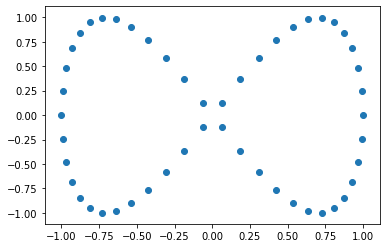

In [31]:
#plt.axis('scaled')
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

Local Simplex
	 time: 0:00:00.105380

 Cliques counting
	 time: 0:00:00.885326

 Edges
	 time: 0:00:00.286691


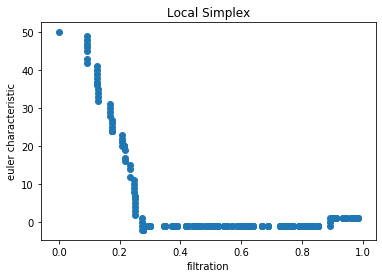

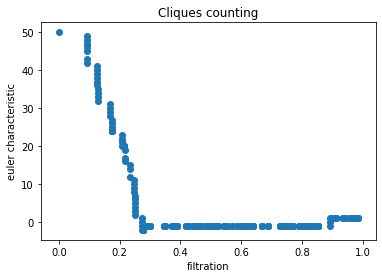

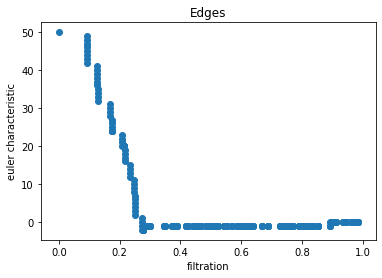

In [32]:
compare_methods(point_cloud, 1, draw_lines=False)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# n shpere

In [33]:
point_cloud = tadasets.dsphere(n=100, d=3, r=1, ambient=5, noise = 0)

Local Simplex
	 time: 0:00:00.721022

 Cliques counting
	 time: 0:00:02.132623

 Edges
	 time: 0:00:01.137371


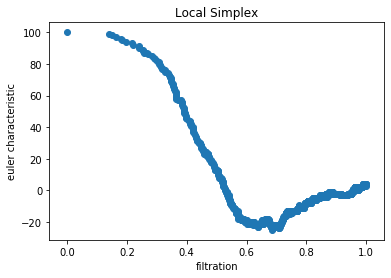

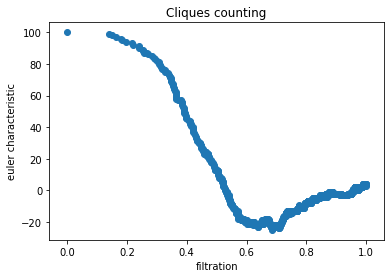

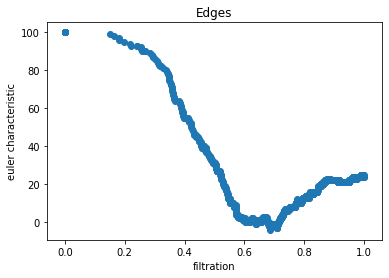

In [34]:
compare_methods(point_cloud, 1, draw_lines=False)

In [35]:
# rounding error

## Hypercube

In [42]:
# random points in the unit cube

N_POINTS = 100
DIMENSION = 3

point_cloud = np.random.rand(N_POINTS,DIMENSION)

Local Simplex
	 time: 0:00:02.599632
	 contributions list lenght:  267663
	 points in the ecc plot:     1256

 Cliques counting
	 time: 0:00:22.441337
	 contributions list lenght:  267663
	 points in the ecc plot:     1256

 Edges
	 time: 0:00:08.643797
	 contributions list lenght:  1256
	 points in the ecc plot:     1256


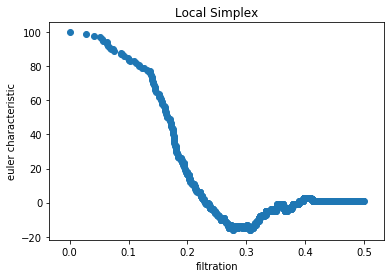

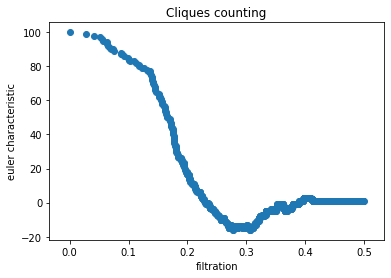

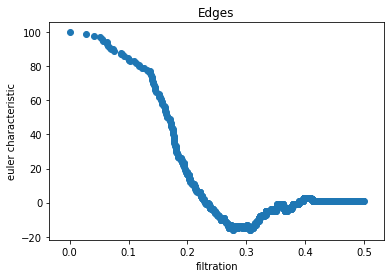

In [43]:
compare_methods(point_cloud, 0.5, draw_lines=False)